e.g., fuzz.ratio("a", "abc"), T = 1 + 3 = 4; M = 1 (only a matches); so 2.0*1/4 = 0.5 (i.e., 50)


Where T is the total number of elements in both sequences, and M is the number of matches, this is 2.0*M / T

MinMaxScaler with range [0.01, 0.99]: <br>
eq: <br>
    X_scaled = scale * X + min - X.min(axis=0) * scale <br>
    where scale = (max - min) / (X.max(axis=0) - X.min(axis=0)) <br>
    
e.g., transform the val 800 to the range [0.01, 0.99]:

scale = (0.99 - 0.01)/ (1000 - 12) <br>
X_scaled = scale * 800 + 0.01 - 12 * scale


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('data/som_clustering_dataset1.csv', sep = ',')

In [2]:
### step 1, normalize a numerical series to a given range
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.01, 0.99))

for i in data.columns[0:-1]:
    x = data[i].values.reshape(-1, 1) 
    x_scaled = min_max_scaler.fit_transform(x)
    data[i] = x_scaled

In [3]:
# step 2, transform the scaled numerical series to an alphabetical sequence
seq_dict = {0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i',9:'j',10:'k',11:'l',
            12:'m',13:'n',14:'o',15:'p',16:'q',17:'r',18:'s',19:'t',20:'u',21:'v',22:'w',23:'x',24:'y',25:'z'}
ref_seq = [] ### for reference sequence
arr = '' 
slot_num = 26
# Put array elements in different alphabet 
for row in range(len(data)):
    for col in range(len(data.columns[0:-1])):
        arr = arr + seq_dict[int(slot_num*data.iloc[row,col])]
    ref_seq.append(arr)   
    arr = ''

In [20]:
# step 3a, match the alphabetical sequence to the reference alphabetical sequence
# this step is done without any clusteing method.
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
arr = 'zptjkzlqonwoekloojqvjszxzilxaaakusitztjmsxmvaaajfjfjjhjlizzuqrowuurvprzzxgrrwmnxvswzxhyzzzyouzzzgzqqlxzmkzvilpkhhotpsyzyygjlnzwkqrsrlkfposhopqfldrzptjkzlqonwoekloojqvjszxzilxaaakusitztjmsxmvaaajfjfjjhjlizzuqrowuurvprzzxgrrwmnxvswzxhyzzzyouzzzgzqqlxzmkzvilpkhhotpsyzyygjlnzwkqrsrlkfposhopqfldr'
tmp_result = process.extract(arr, ref_seq, scorer = fuzz.partial_ratio, limit= len(ref_seq))
print(tmp_result[0:5])
#print(tmp_result[0:len(ref_seq)])

[('egcdbfefghhhmoxujgeeebeefbcbgbbeghfdfihfbslijvieecbdebdeciffcekgghhlfhbbfeebnchighgggadegedgdggjxpgfdjabbdehdddacdbidgcegbimfcckehdcedbgaeedepedbe', 100), ('dgdcbbadccgdbcdejgfedcegfbfelhefbgbgcfcdddffegdabdiddcfeghfeccbbcchddgdbbgdbedeaiefdjbdbecdbcdebejicccgbfdcffbbbbcbbebfdfdccbaabcdbdebbeabadbdbabe', 47), ('dhfeccbeeclecdgejgjifdfhgcfinkefgidiehdffdgggiebcejdfegfgifecfbdcdiffgfbbhddhdeajggfjcdbicebdegdfjiddcgcgdeffbbccdddgcfffdccbacdcdbdfdcgadbebedbbe', 47), ('akidbfedfgghkmtpebdlidcijlcbgcbgciadbbedegcegecbbdcbdccgdfchbdebfiebgehdccbfefgebcghgehegghhffdiegelhgggeebfebddcleeggfbfcadfdhbgbbkciaefvbckekogh', 46), ('gccbbddfjfcgmntsjedbfejffbcegdaegjedcidecqkfilegfaeffbcfbddeabhehgfgdfeeedghpdnkkfdhfagbkccddfcippedbeabcbcdcccabdbegcdeccflfcajefbefeajcfecgjahbe', 45)]


In [28]:
### find the exact time series id, e.g., if the ans is '297', it means the 297th time series is the best match from the query.
for i in range(len(ref_seq)):
    if(ref_seq[i] == tmp_result[0][0]):
        print(i)

218


################################################################################################################################

In [6]:
# step 3b, match the alphabetical sequence to the reference alphabetical sequence
# this step is with a clustering method.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ref_seq

In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [8]:
true_k = 15 ### set 15 clusters 
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=15, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
clustering_pattern = []
for i in range(true_k):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :1]:
        print (' %s' % terms[ind],)
        print(ind)
        clustering_pattern.append(terms[ind])
    print()

Top terms per cluster:
Cluster 0:
 zptjkzlqonwoekloojqvjszxzilxvlkkusitztjmsxmvpnpjfjfjjhjlizzuqrowuurvprzzxgrrwmnxvswzxhyzzzyouzzzgzqqlxzmkzvilpkhhotpsyzyygjlnzwkqrsrlkfposhopqfldr
330

Cluster 1:
 afefcigjdgjhlmuscbbkijkkmdeeddcgagedcfgdegggdgccdbbdebcgdnccfgiggljhkkibfcfehigffieheejlihigfjdhgjdijgfhfeafhhpedjiwrlfhjgeijfwgnbhihndmmwegdgfiol
103

Cluster 2:
 beaehccfeabbcehccaabefebcabdabaapfbdabcabbdecieacbcbbcccbaaaabbbccbcfcabbbaeabdcfabbbababccdhgfccgdfgbcbbabfabbaaaaadbdbcaaabaaaaaaabaaaaebcbbaabd
181

Cluster 3:
 ahcabaeabdhkcccbbcedabbcaabceaaaebbabdcbbbbbabhfhjfjigjlkodcdfdgchiehhcddbdaachfcbcdcbaacbbdhhieccfdfhihddihgjbecdeheiehkdihlmfdhfikchajjdefcidgcd
113

Cluster 4:
 bfbbcdbaaaecklsoebbbbaabdbaaabbbacabbeaacdcbbacaabaaabecbbaabaaabbbbegbebaadaabbbabaabacccebddbbaaabbaccadcbaecbacabdabcabbbdccabbaaaaaacacaacacbd
185

Cluster 5:
 beedccacaddffdegleeecbeiihrjkhhefccgbgghdadhbmedeffcdgffacdcgddhkolgfkeeccgigikijgccncgiccliffeidbffdbcbcecjccecdcbeehffgfedimljeieifiagleejgjkjg

In [23]:
from fuzzywuzzy import process
arr1 = "zptjkzlqonwoekloojqvjszxzilxaaakusitztjmsxmvaaajfjfjjhjlizzuqrowuurvprzzxgrrwmnxvswzxhyzzzyouzzzgzqqlxzmkzvilpkhhotpsyzyygjlnzwkqrsrlkfposhopqfldr"
tmp_result = process.extract(arr1, clustering_pattern, scorer = fuzz.partial_ratio, limit= len(clustering_pattern))
print(tmp_result[0:5])
#print(tmp_result[0:len(clustering_pattern)])

[('beedccacaddffdegleeecbeiihrjkhhefccgbgghdadhbmedeffcdgffacdcgddhkolgfkeeccgigikijgccncgiccliffeidbffdbcbcecjccecdcbeehffgfedimljeieifiagleejgjkjge', 41), ('kiegehbdvxhputwufcbejfefceehgosjqjdgegeighkkinlmnnjmwinolndfhrxnkwjilnfhhfdbedlijedemdekgfjhemiefedmijjqwdfggigdbdhfsmkhghfhnojgehbgfebedihkcdbccf', 40), ('afefcigjdgjhlmuscbbkijkkmdeeddcgagedcfgdegggdgccdbbdebcgdnccfgiggljhkkibfcfehigffieheejlihigfjdhgjdijgfhfeafhhpedjiwrlfhjgeijfwgnbhihndmmwegdgfiol', 39), ('gjhfgcefighidgggphfikkfecdaddjghjzzjgexlihhdikfgbfddedghgdaimqdcbdhejhbddfdhegkdcbbdkhhacgkggkkbcghmhbfcabeqnezebmgbixilgmfbgmcdbbbcbphhdhzxcckibh', 39), ('bpcdddglehledehjlgfmhffmmeijmhjijnfiglhdlhggcihdfmtlpgfheedehcbgedegfcfgglgdihggqepdicgfccfeeggcbedecbijodbbedgcecbffbhgfaegdffmhdhiohdddieldbhccf', 39)]


In [26]:
ref_seq[330]

'gefggpcdjkeifcdgbgbdhfbdbcdgghjhgebbcdjhfeihmljlknkopmoqkodiijieejhijibdheddgdkakcfbjccfacdlfmfeefdjigkszighjegdageglhghjbdhdsdbjnliffbhhbhjeiehdf'

In [24]:
### find the exact time series id, e.g., if the ans is '297', it means the 297th time series is the best match from the query.
for i in range(len(ref_seq)):
    if(ref_seq[i] == tmp_result[0][0]):
        print(i)

218


################################################################################################################################

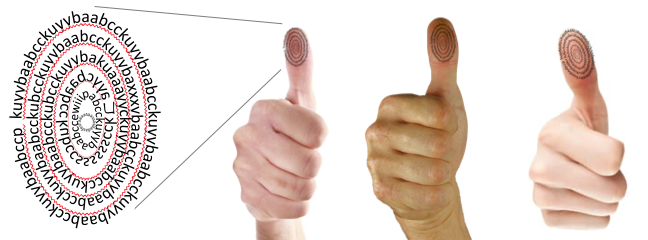